## CLASSIFICATION QUESTION (Prediction)
1. Given a Pokemon's sum of their HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed (Total column), can we predict whether or not they are legendary? (k-Nearest Neighbor)

- Feature: *Total Column Variable* which is the sum of a specific Pokemon's HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed

- Dependent Variable: *Legendary* which is a boolean value determining whether or not the Pokemon is a legendary

In [10]:
neighbors = 3

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [12]:
dataframe = pd.read_csv('Datasets/Pokemon.csv')
dataframe = dataframe.dropna(axis=0, inplace=False, subset=["Total", "Legendary"])
dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [13]:
'''q1 = dataframe['Total'].quantile(0.25)
q3 = dataframe['Total'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

dataframe = dataframe[(dataframe['Total'] >= lower_bound) & (dataframe['Total'] <= upper_bound)]'''

"q1 = dataframe['Total'].quantile(0.25)\nq3 = dataframe['Total'].quantile(0.75)\niqr = q3 - q1\n\nlower_bound = q1 - 1.5 * iqr\nupper_bound = q3 + 1.5 * iqr\n\ndataframe = dataframe[(dataframe['Total'] >= lower_bound) & (dataframe['Total'] <= upper_bound)]"

In [14]:
x = dataframe[['Total']]
y = dataframe[['Legendary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_val_encoded = le.transform(y_val.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

model = KNeighborsClassifier(n_neighbors=neighbors, weights="distance")
model.fit(x_train, y_train_encoded)
model.score(x_train, y_train_encoded)

0.9607142857142857

### ERROR EVALUATION

In [15]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

##### TRAINING DATA ERROR

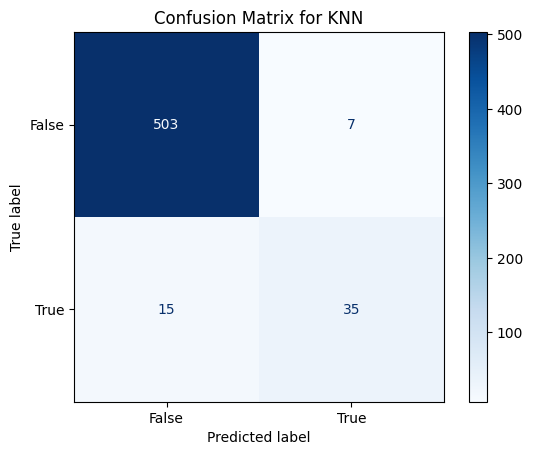

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       510
           1       0.83      0.70      0.76        50

    accuracy                           0.96       560
   macro avg       0.90      0.84      0.87       560
weighted avg       0.96      0.96      0.96       560



In [16]:
train_matrix = confusion_matrix(y_train_encoded, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=train_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

train_report = classification_report(y_train_encoded, y_train_pred)
print(train_report)

##### VALIDATION DATA ERROR

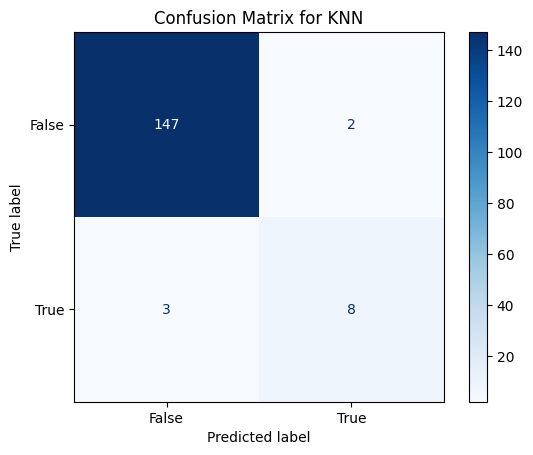

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       149
           1       0.80      0.73      0.76        11

    accuracy                           0.97       160
   macro avg       0.89      0.86      0.87       160
weighted avg       0.97      0.97      0.97       160



In [17]:
val_matrix = confusion_matrix(y_val_encoded, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=val_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

val_report = classification_report(y_val_encoded, y_val_pred)
print(val_report)

##### TESTING DATA ERROR

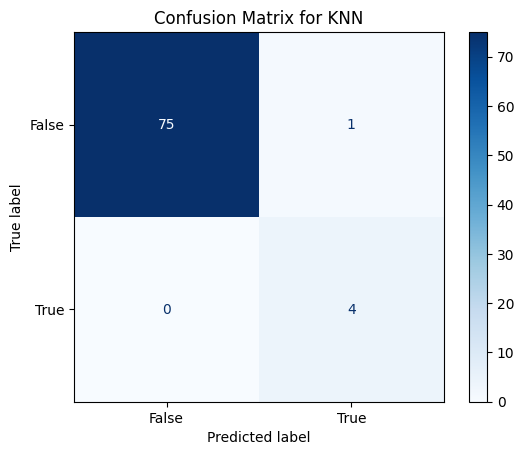

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.80      1.00      0.89         4

    accuracy                           0.99        80
   macro avg       0.90      0.99      0.94        80
weighted avg       0.99      0.99      0.99        80



In [18]:
test_matrix = confusion_matrix(y_test_encoded, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

test_report = classification_report(y_test_encoded, y_test_pred)
print(test_report)